In [2]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [3]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 
                  'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 
                  'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 
                  'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 
                  'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 
                  'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 
                  'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 
                  'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 
                  'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 
                  'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 
                  'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 
                  'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 
                  'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 
                  'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 
                  'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 
                  'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 
                  'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 
                  'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 
                  'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 
                  'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 
                  'a5ce', 'a457', 'adab', 'aa46', 'a46a']
IMG_X = 100
IMG_Y = 100

In [4]:
def create_training_data():
    """takes no arguments, accessess data in file and returns it as a list containing [0] a unique id, 
    [1] category, [2] class_type, [3] category + class_type, [4] horizontal average, [5] vertical average, 
    [6] the original image resized to be a 100 X 100 array"""
    data = []
    unique_id = 0
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), 
                                       cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                horizontal_average = np.average(new_array, axis=1)
                vertical_average = np.average(new_array, axis=0)
                data.append([unique_id, category, class_type, category + "-" + class_type, 
                             horizontal_average, vertical_average, new_array])
                unique_id += 1
            except Exception as e:
                print('something went wrong')
    return data

In [5]:
complete_data = create_training_data()

In [6]:
complete_data[0][0]

0

In [7]:
complete_data[-1][0]

8231

In [8]:
len(complete_data)

8232

In [9]:
indexed_complete_data = complete_data.copy()

In [10]:
def shuffle(data):
    """takes a list of data as an input and outputs a shuffled list 
    with 100 testing data elements and the rest as training data"""
    random.shuffle(data)
    testing_data = data[-100:]
    training_data = data[0:-100]
    return data, testing_data, training_data

In [11]:
shuffled_data, testing_data, training_data = shuffle(complete_data)

In [12]:
shuffled_data[0][0]

3755

In [13]:
complete_data[0][0]

3755

In [14]:
indexed_complete_data[0][0]

0

In [15]:
shuffled_data[0]

[3755,
 'a453',
 'chuxi',
 'a453-chuxi',
 array([  3.17,  10.79,  18.86,  17.07,  16.25,  16.18,  18.2 ,  19.04,
         19.06,  19.25,  20.34,  22.34,  22.42,  23.34,  25.5 ,  25.75,
         25.75,  25.75,  27.64,  28.74,  26.58,  29.04,  33.17,  37.2 ,
         42.76,  48.65,  50.65,  51.6 ,  51.69,  49.5 ,  49.48,  51.57,
         49.46,  48.21,  48.39,  48.73,  49.54,  51.24,  51.54,  51.51,
         51.54,  48.57,  44.44,  40.12,  35.96,  32.36,  32.37,  34.71,
         39.02,  49.43,  80.96, 133.58, 131.31, 128.1 , 126.41, 113.09,
         99.76,  89.13,  71.84,  54.09,  39.52,  27.96,  19.58,  19.58,
         20.89,  22.4 ,  20.1 ,  19.13,  19.13,  19.13,  19.13,  19.13,
         19.13,  19.13,  19.13,  21.16,  22.66,  22.66,  21.04,  19.58,
         19.58,  21.05,  22.66,  22.67,  22.67,  22.65,  22.47,  29.67,
         41.75,  41.73,  39.71,  35.7 ,  33.55,  31.39,  29.1 ,  23.51,
         15.2 ,   2.46,   0.  ,   0.  ]),
 array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0. 

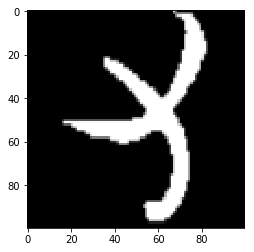

In [16]:
plt.imshow(shuffled_data[0][-1], cmap='gray')

In [17]:
def fingerprint_test(testing, training):
    """Takes our testing data and training data as inputs and returns our closest match for each of the testing images
    based on our 'training' images"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0]])
        guess_index = np.argmin([x[0] for x in best_guess])
        guesses.append([x[0], best_guess[guess_index][1]])
    return guesses

In [18]:
test = fingerprint_test(testing_data, training_data)

In [30]:
def give_score(test):
    """Takes our return object from fingerprint_test and returns the percent accuracy of our model"""
    total = 0
    correct = 0
    for x, y in test:
        if indexed_complete_data[x][1] == indexed_complete_data[y][1]:
            correct += 1
        total += 1
    return correct/total

In [20]:
score = give_score(test)

In [21]:
score

0.69

In [22]:
len(test)

100

In [27]:
test[1]

[4939, 4905]

a56b-jinwen


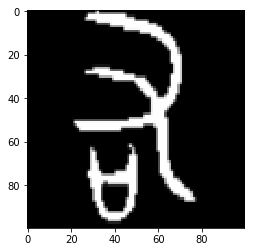

In [28]:
print(indexed_complete_data[test[1][0]][3])
plt.imshow(indexed_complete_data[test[1][0]][-1], cmap='gray')

a56b-jinwen


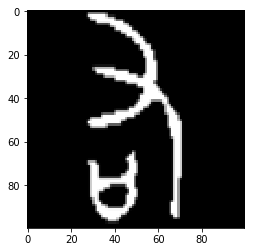

In [29]:
print(indexed_complete_data[test[1][1]][3])
plt.imshow(indexed_complete_data[test[1][1]][-1], cmap='gray')

In [31]:
def run_n_simulations(n, data):
    """Takes the number of simulations n and our original data as an input and shuffles the images n times 
    remember the accuracy of each shuffle then returns the overall percent accuracy a 
    long with the high and low accuracy"""
    all_scores = []
    for _ in range(n):
        shuffled_data, testing_data, training_data = shuffle(complete_data)
        test = fingerprint_test(testing_data, training_data)
        score = give_score(test)
        all_scores.append(score)
    return all_scores

In [37]:
%%time
returned_scores = run_n_simulations(100, complete_data)

CPU times: user 22min 23s, sys: 1.05 s, total: 22min 24s
Wall time: 22min 25s


In [40]:
sum(returned_scores)/100

0.6478000000000003

### Take a dive into the best_guess list in fingerprint_test

In [ ]:
def fingerprint_test(testing, training):
    """Takes our testing data and training data as inputs and returns our closest match for each of the testing images
    based on our 'training' images"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0]])
        guess_index = np.argmin([x[0] for x in best_guess])
        guesses.append([x[0], best_guess[guess_index][1]])
    return guesses

In [61]:
def fingerprint_test_top_values(testing, training):
    """does the same as fingerprint_test but takes a closer look at the best_guess list to see how the function
    is guessing"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0], y[3]])
        list_of_indexes = np.argpartition([x[0] for x in best_guess], range(5))[:5]
        guesses.append([x[3], [indexed_complete_data[x][3] for x in list_of_indexes]])
    return guesses

In [64]:
%%time
top_five = fingerprint_test_top_values(testing_data, training_data)

CPU times: user 14.5 s, sys: 11.4 ms, total: 14.5 s
Wall time: 14.5 s


In [63]:
top_five

[['a448-chuxi',
  ['a751-oracle', 'a451-chuxi', 'a4d1-chuxi', 'a8bd-chuxi', 'b773-chuxi']],
 ['a56b-jinwen',
  ['a4a7-chuxi', 'a9fa-smallseal', 'a4a7-chuxi', 'b54c-chuxi', 'a4a4-jinwen']],
 ['a4f1-jinwen',
  ['a8a3-jinwen', 'a8ae-chuxi', 'a453-chuxi', 'a548-chuxi', 'a453-jinwen']],
 ['adab-jinwen',
  ['a4a7-chuxi', 'aaf8-chuxi', 'bb50-chuxi', 'a5aa-chuxi', 'a4bd-chuxi']],
 ['a8c6-jinwen',
  ['a4a3-chuxi', 'a473-chuxi', 'ac46-chuxi', 'a548-jinwen', 'a5a6-jinwen']],
 ['a448-chuxi',
  ['a6b8-oracle', 'a457-chuxi', 'a4eb-chuxi', 'b1d0-oracle', 'a67e-jinwen']],
 ['a9d2-chuxi',
  ['a56b-chuxi', 'a4a7-jinwen', 'a668-jinwen', 'b6c0-chuxi', 'a740-chuxi']],
 ['a8bd-chuxi',
  ['b54c-chuxi', 'a8e4-jinwen', 'a56b-jinwen', 'a467-chuxi', 'a5d0-chuxi']],
 ['aaf7-jinwen',
  ['a4d1-jinwen', 'aaf7-chuxi', 'a56b-jinwen', 'b0a8-chuxi', 'a4a7-chuxi']],
 ['b6c0-chuxi',
  ['a447-chuxi', 'a5aa-chuxi', 'aaf8-chuxi', 'a4a7-chuxi', 'a4a7-jinwen']],
 ['a7da-jinwen',
  ['a46a-jinwen', 'a67e-jinwen', 'a4d1-jinwen', 

In [65]:
def give_score_from_top_five(test):
    """Takes our return object from fingerprint_test and returns the percent accuracy of our model"""
    total = 0
    correct = 0
    for x, y in test:
        if x == y[0]:
            correct += 1
        total += 1
    return correct/total

In [66]:
give_score_from_top_five(top_five)

0.01

In [68]:
current = fingerprint_test(testing_data, training_data)

In [69]:
give_score(current)

0.69